In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import json

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
feture_folder = '/home/ubuntu/meme_data/VB/'
with open(feture_folder + 'train.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_train = np.concatenate((X2, X3, X4, X5, X6), axis = 1)
    label_train = np.asarray(temp['label'])

with open(feture_folder + 'dev.pickle', 'rb') as f:
    temp = pickle.load(f)
    X1 = np.asarray(temp['feature_vb'])
    X2 = np.asarray(temp['txt_fea'])
    X3 = np.asarray(temp['txt_mod'])
    X4 = np.asarray(temp['txt_img_fea'])
    X5 = np.asarray(temp['img_fea'])
    X6 = np.asarray(temp['img_mod'])
    X_dev = np.concatenate((X2, X3, X4, X5, X6), axis = 1)
    Id_dev = np.asarray(temp['id'])
    label_dev = np.asarray(temp['label'])

num_classes = len(np.unique(label_train))

In [3]:
N_feature = X_train.shape[1]

model = Sequential([
    layers.Dropout(0.3, input_shape = (N_feature, )),
    layers.Dense(128, activation= 'sigmoid'),
    layers.Dropout(0.3),
    layers.Dense(128, activation= 'tanh'),
    layers.Dropout(0.3),
    layers.Dense(32, activation= 'tanh'),
    layers.Dropout(0.3),
    layers.Dense(32, activation= 'tanh'),
    layers.Dropout(0.2),
    layers.Dense(16, activation= 'tanh'),
    layers.Dropout(0.2),
    layers.Dense(16, activation= 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(8, activation= 'tanh'),
    layers.Dense(1, activation= 'sigmoid')
])

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy', tf.keras.metrics.AUC()])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 3333)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               426752    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dens

In [4]:
wei = np.where(label_train==1, len(label_train[label_train==0])/len(label_train[label_train==1]) , 1)

epochs = 500
history = model.fit(X_train, label_train,
                    validation_data = (X_dev, label_dev),
                    epochs=epochs, 
                    batch_size = 256, 
                    sample_weight = wei
)

Train on 8500 samples, validate on 500 samples
Epoch 1/500
8500/8500 [==============================] - 1s 111us/sample - loss: 0.9224 - acc: 0.5054 - auc: 0.5086 - val_loss: 0.6954 - val_acc: 0.5060 - val_auc: 0.5851
Epoch 2/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.8869 - acc: 0.5478 - auc: 0.5611 - val_loss: 0.6850 - val_acc: 0.5540 - val_auc: 0.5882
Epoch 3/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.8535 - acc: 0.6120 - auc: 0.6342 - val_loss: 0.6994 - val_acc: 0.5560 - val_auc: 0.5934
Epoch 4/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.8252 - acc: 0.6468 - auc: 0.6761 - val_loss: 0.7334 - val_acc: 0.5520 - val_auc: 0.5971
Epoch 5/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.8138 - acc: 0.6668 - auc: 0.6898 - val_loss: 0.6978 - val_acc: 0.5700 - val_auc: 0.5994
Epoch 6/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.8051 - acc: 0.6869 -

Epoch 49/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.7011 - acc: 0.7074 - auc: 0.7956 - val_loss: 0.7094 - val_acc: 0.5920 - val_auc: 0.6598
Epoch 50/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.7008 - acc: 0.7166 - auc: 0.7978 - val_loss: 0.7121 - val_acc: 0.5940 - val_auc: 0.6569
Epoch 51/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.6919 - acc: 0.7128 - auc: 0.8019 - val_loss: 0.6829 - val_acc: 0.5880 - val_auc: 0.6586
Epoch 52/500
8500/8500 [==============================] - 0s 38us/sample - loss: 0.6961 - acc: 0.7198 - auc: 0.8009 - val_loss: 0.7169 - val_acc: 0.5880 - val_auc: 0.6590
Epoch 53/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.6960 - acc: 0.7082 - auc: 0.7992 - val_loss: 0.6676 - val_acc: 0.5980 - val_auc: 0.6602
Epoch 54/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.6886 - acc: 0.7169 - auc: 0.8055 - val_loss: 0.7204 - val_acc:

Epoch 97/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.6480 - acc: 0.7340 - auc: 0.8304 - val_loss: 0.7323 - val_acc: 0.6060 - val_auc: 0.6647
Epoch 98/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.6381 - acc: 0.7434 - auc: 0.8358 - val_loss: 0.7301 - val_acc: 0.6040 - val_auc: 0.6631
Epoch 99/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.6484 - acc: 0.7322 - auc: 0.8286 - val_loss: 0.7093 - val_acc: 0.5980 - val_auc: 0.6628
Epoch 100/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.6499 - acc: 0.7306 - auc: 0.8278 - val_loss: 0.7002 - val_acc: 0.6020 - val_auc: 0.6643
Epoch 101/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.6388 - acc: 0.7434 - auc: 0.8361 - val_loss: 0.7168 - val_acc: 0.6060 - val_auc: 0.6595
Epoch 102/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.6446 - acc: 0.7362 - auc: 0.8322 - val_loss: 0.6833 - val_a

Epoch 145/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.6015 - acc: 0.7589 - auc: 0.8556 - val_loss: 0.7146 - val_acc: 0.6320 - val_auc: 0.6764
Epoch 146/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.6002 - acc: 0.7551 - auc: 0.8564 - val_loss: 0.7039 - val_acc: 0.6420 - val_auc: 0.6749
Epoch 147/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.5926 - acc: 0.7592 - auc: 0.8599 - val_loss: 0.7274 - val_acc: 0.6440 - val_auc: 0.6734
Epoch 148/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.5956 - acc: 0.7559 - auc: 0.8589 - val_loss: 0.7280 - val_acc: 0.6160 - val_auc: 0.6756
Epoch 149/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.5925 - acc: 0.7593 - auc: 0.8598 - val_loss: 0.6955 - val_acc: 0.6400 - val_auc: 0.6745
Epoch 150/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.5986 - acc: 0.7555 - auc: 0.8567 - val_loss: 0.7304 - va

8500/8500 [==============================] - 0s 34us/sample - loss: 0.5480 - acc: 0.7792 - auc: 0.8827 - val_loss: 0.8137 - val_acc: 0.6420 - val_auc: 0.6807
Epoch 193/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.5456 - acc: 0.7835 - auc: 0.8832 - val_loss: 0.7868 - val_acc: 0.6300 - val_auc: 0.6814
Epoch 194/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.5456 - acc: 0.7814 - auc: 0.8835 - val_loss: 0.7676 - val_acc: 0.6420 - val_auc: 0.6835
Epoch 195/500
8500/8500 [==============================] - 0s 38us/sample - loss: 0.5458 - acc: 0.7836 - auc: 0.8827 - val_loss: 0.7740 - val_acc: 0.6480 - val_auc: 0.6840
Epoch 196/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.5381 - acc: 0.7812 - auc: 0.8865 - val_loss: 0.8074 - val_acc: 0.6280 - val_auc: 0.6806
Epoch 197/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.5446 - acc: 0.7867 - auc: 0.8848 - val_loss: 0.7641 - val_acc: 0.6420 

Epoch 240/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.4922 - acc: 0.8059 - auc: 0.9066 - val_loss: 0.8467 - val_acc: 0.6360 - val_auc: 0.6887
Epoch 241/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.4881 - acc: 0.8098 - auc: 0.9076 - val_loss: 0.7982 - val_acc: 0.6520 - val_auc: 0.6914
Epoch 242/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.5008 - acc: 0.7991 - auc: 0.9033 - val_loss: 0.7829 - val_acc: 0.6540 - val_auc: 0.6917
Epoch 243/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.4961 - acc: 0.8109 - auc: 0.9050 - val_loss: 0.8034 - val_acc: 0.6240 - val_auc: 0.6917
Epoch 244/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.4862 - acc: 0.8099 - auc: 0.9089 - val_loss: 0.8335 - val_acc: 0.6240 - val_auc: 0.6932
Epoch 245/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.4909 - acc: 0.8104 - auc: 0.9064 - val_loss: 0.8174 - va

8500/8500 [==============================] - 0s 34us/sample - loss: 0.4553 - acc: 0.8236 - auc: 0.9201 - val_loss: 0.8078 - val_acc: 0.6500 - val_auc: 0.6941
Epoch 288/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.4517 - acc: 0.8281 - auc: 0.9212 - val_loss: 0.8459 - val_acc: 0.6580 - val_auc: 0.6972
Epoch 289/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.4470 - acc: 0.8247 - auc: 0.9234 - val_loss: 0.8745 - val_acc: 0.6220 - val_auc: 0.6982
Epoch 290/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.4441 - acc: 0.8291 - auc: 0.9240 - val_loss: 0.9494 - val_acc: 0.6180 - val_auc: 0.6933
Epoch 291/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.4529 - acc: 0.8220 - auc: 0.9207 - val_loss: 0.8329 - val_acc: 0.6560 - val_auc: 0.6985
Epoch 292/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.4508 - acc: 0.8267 - auc: 0.9222 - val_loss: 0.8635 - val_acc: 0.6340 

Epoch 335/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.3980 - acc: 0.8533 - auc: 0.9398 - val_loss: 0.9691 - val_acc: 0.6280 - val_auc: 0.6910
Epoch 336/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.4020 - acc: 0.8475 - auc: 0.9381 - val_loss: 0.9975 - val_acc: 0.6320 - val_auc: 0.6944
Epoch 337/500
8500/8500 [==============================] - 0s 38us/sample - loss: 0.3907 - acc: 0.8536 - auc: 0.9419 - val_loss: 0.9393 - val_acc: 0.6360 - val_auc: 0.6944
Epoch 338/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.3973 - acc: 0.8548 - auc: 0.9403 - val_loss: 0.9543 - val_acc: 0.6340 - val_auc: 0.6961
Epoch 339/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.3930 - acc: 0.8528 - auc: 0.9406 - val_loss: 0.9040 - val_acc: 0.6460 - val_auc: 0.6959
Epoch 340/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.3997 - acc: 0.8484 - auc: 0.9392 - val_loss: 0.9544 - va

8500/8500 [==============================] - 0s 34us/sample - loss: 0.3563 - acc: 0.8701 - auc: 0.9516 - val_loss: 1.0432 - val_acc: 0.6320 - val_auc: 0.6937
Epoch 383/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.3520 - acc: 0.8722 - auc: 0.9528 - val_loss: 1.0521 - val_acc: 0.6340 - val_auc: 0.6942
Epoch 384/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.3713 - acc: 0.8628 - auc: 0.9472 - val_loss: 1.1240 - val_acc: 0.6060 - val_auc: 0.6953
Epoch 385/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.3617 - acc: 0.8669 - auc: 0.9503 - val_loss: 1.0032 - val_acc: 0.6280 - val_auc: 0.6974
Epoch 386/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.3624 - acc: 0.8692 - auc: 0.9500 - val_loss: 1.0080 - val_acc: 0.6400 - val_auc: 0.6938
Epoch 387/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.3473 - acc: 0.8718 - auc: 0.9540 - val_loss: 1.0303 - val_acc: 0.6400 

Epoch 430/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.3282 - acc: 0.8838 - auc: 0.9593 - val_loss: 1.0188 - val_acc: 0.6500 - val_auc: 0.6937
Epoch 431/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.3261 - acc: 0.8838 - auc: 0.9591 - val_loss: 1.0805 - val_acc: 0.6200 - val_auc: 0.6907
Epoch 432/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.3223 - acc: 0.8896 - auc: 0.9606 - val_loss: 1.0761 - val_acc: 0.6380 - val_auc: 0.6879
Epoch 433/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.3255 - acc: 0.8834 - auc: 0.9600 - val_loss: 1.1180 - val_acc: 0.6140 - val_auc: 0.6896
Epoch 434/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.3115 - acc: 0.8926 - auc: 0.9627 - val_loss: 1.1524 - val_acc: 0.6240 - val_auc: 0.6889
Epoch 435/500
8500/8500 [==============================] - 0s 36us/sample - loss: 0.3188 - acc: 0.8881 - auc: 0.9608 - val_loss: 1.1330 - va

8500/8500 [==============================] - 0s 34us/sample - loss: 0.2880 - acc: 0.9006 - auc: 0.9685 - val_loss: 1.0687 - val_acc: 0.6320 - val_auc: 0.6952
Epoch 478/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.2958 - acc: 0.8947 - auc: 0.9667 - val_loss: 1.1477 - val_acc: 0.6300 - val_auc: 0.6948
Epoch 479/500
8500/8500 [==============================] - 0s 37us/sample - loss: 0.2933 - acc: 0.9005 - auc: 0.9673 - val_loss: 1.0980 - val_acc: 0.6520 - val_auc: 0.6943
Epoch 480/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.2846 - acc: 0.9019 - auc: 0.9685 - val_loss: 1.2133 - val_acc: 0.6300 - val_auc: 0.6905
Epoch 481/500
8500/8500 [==============================] - 0s 34us/sample - loss: 0.2882 - acc: 0.8998 - auc: 0.9687 - val_loss: 1.1378 - val_acc: 0.6360 - val_auc: 0.6950
Epoch 482/500
8500/8500 [==============================] - 0s 35us/sample - loss: 0.2862 - acc: 0.8985 - auc: 0.9683 - val_loss: 1.1748 - val_acc: 0.6340 

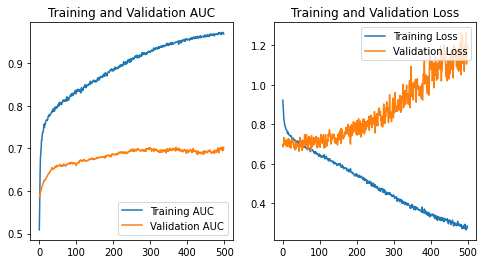

In [5]:
acc = history.history[list(history.history.keys())[2]]
val_acc = history.history[list(history.history.keys())[-1]]

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training AUC')
plt.plot(epochs_range, val_acc, label='Validation AUC')
plt.legend(loc='lower right')
plt.title('Training and Validation AUC')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Validation AUC ROC with image: 0.7020639999999998


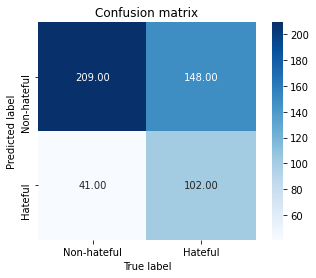

In [6]:
prob = model.predict(X_dev)
print('Validation AUC ROC with image:', roc_auc_score(label_dev, prob, multi_class='ovo'))

confusion = confusion_matrix(
label_dev, np.round(prob, 0))

axis_labels = ['Non-hateful', 'Hateful']
ax = sns.heatmap(
    confusion.T, xticklabels=axis_labels, yticklabels=axis_labels,
    cmap='Blues', annot=True, fmt='.2f', square=True)
plt.title("Confusion matrix")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

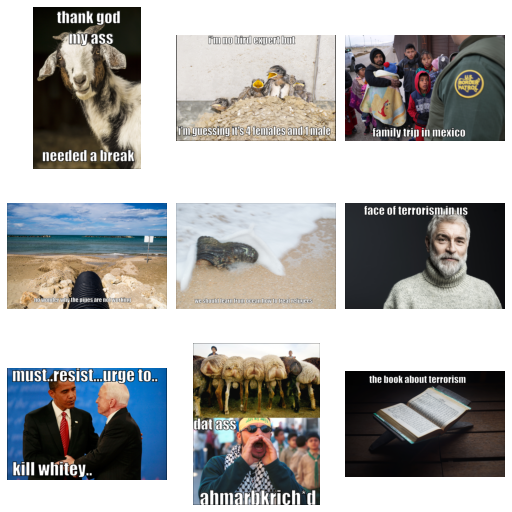

In [7]:
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 1][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')

False Positive


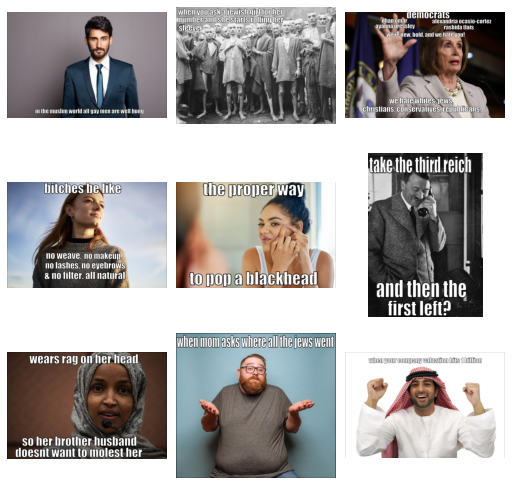

In [8]:
print("False Positive")
fig = plt.figure(figsize=(7, 7), constrained_layout=True)
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

err = np.abs(label_dev - prob[:, 0])
Id_err = err.argsort()[::-1]
for ID, i in zip(Id_err[label_dev[Id_err] == 0][:9], range(9)):
    fig.add_subplot(grid[i//3, i%3])
    img = str(Id_dev[ID])
    img = '0' * (5 - len(img)) + img
    img = mpimg.imread('/home/ubuntu/meme_data/data/img/' + img + '.png')
    plt.imshow(img)
    plt.axis('Off')